# Simple Linear Regession

Plagiarized from:

> https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.shape

(10, 2)

In [4]:
dataset.head()

,x,y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [5]:
dataset.describe()

,x,y
count,10.00000,10.00000
mean,4.50000,4.50000
std,3.02765,3.02765
min,0.00000,0.00000
25%,2.25000,2.25000
50%,4.50000,4.50000
75%,6.75000,6.75000
max,9.00000,9.00000


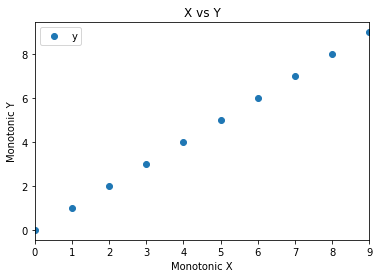

In [6]:
dataset.plot(x='x', y='y', style='o')
plt.title('X vs Y')
plt.xlabel('Monotonic X')
plt.ylabel('Monotonic Y')
plt.show()

In [7]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [8]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [9]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
x_train

array([[4],
       [9],
       [1],
       [6],
       [7],
       [3],
       [0],
       [5]])

In [13]:
x_test

array([[2],
       [8]])

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(regressor.intercept_, regressor.coef_)

-8.881784197001252e-16 [1.]


In [17]:
y_pred = regressor.predict(x_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,2,2.0
1,8,8.0


# Generate Some Time-Based Data & Predict

Idea is to:

- Generate some sample data looking like its' time-based
- Perform a linear regression
- Predict 30s ahead

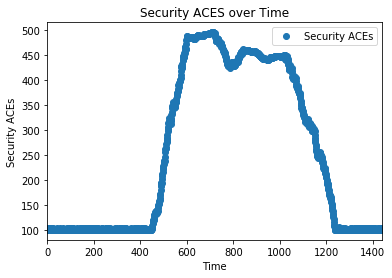

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random


def gen_next_data(slot, last_y):
    if slot <= 450:
        # 0000 to 0730: morning befure people arrive
        retval = 100 + int(random.random() * 8 - 4)
    elif slot <= 600:
        # 0730 to 1000: people start arriving
        retval = last_y + int(random.random() * 15 - 5)
    elif slot <= 720:
        # 1000 to 1200: a kid of plateau
        retval = last_y + int(random.random() * 3 - 1.5)
    elif slot <= 780:
        # 1200 to 1300: some people go to lunch
        retval = last_y + int(random.random() * 8 - 5)
    elif slot <= 840:
        # 1300 to 1400: people come back
        retval = last_y + int(random.random() * 8 - 3)
    elif slot <= 1020:
        # 1400 to 1700: steadyish state
        retval = last_y + int(random.random() * 3 - 1.5)
    elif slot <= 1260:
        # 1700 to 2100: people leave office
        retval = last_y + int(random.random() * 12 - 8)
    else:
        # after 2100: steadyish state
        retval = 100 + int(random.random() * 8 - 4)
    if retval < 100:
        return 100
    else:
        return retval
    

NUM_POINTS = 1440

last_y = 100
time_vals = []
y_vals = []
for i in range(0, NUM_POINTS):
    # t += INTERVAL
    # time_vals.append(t)
    time_vals.append(i)
    last_y = gen_next_data(i, last_y)
    y_vals.append(last_y)
df = pd.DataFrame({'Time': time_vals, 'Security ACEs': y_vals})
df.plot(x='Time', y='Security ACEs', style='o')
plt.title('Security ACES over Time')
plt.xlabel('Time')
plt.ylabel('Security ACEs')
plt.show()

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, regressor.coef_)

138.30189310210432 [0.02038725]


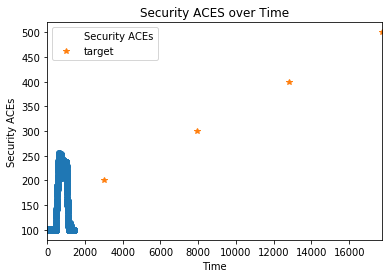

In [104]:
# Solve for when Security ACEs = 500
TARGETS = [200, 300, 400, 500]

t_arr = [ (t - regressor.intercept_) / regressor.coef_[0] for t in TARGETS]
df2 = pd.DataFrame({'t': t_arr, 'target': TARGETS})

ax = df.plot(x='Time', y='Security ACEs', style='o')
df2.plot(x='t', y='target', style='*', ax=ax)
plt.title('Security ACES over Time')
plt.xlabel('Time')
plt.ylabel('Security ACEs')
plt.show()

In [46]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,161,167.044144
1,293,299.895880
2,108,113.903450
3,240,231.255816
4,261,275.539728
5,312,315.395249
6,137,144.902188
7,266,271.111337
8,240,229.041621
9,318,319.823640


# How To Generate "Realistic Data"

Possible steps:

- Normalize day into 1 minute chunks, giving 1440 data points
- Carve up day into random functions:
    - 0000 to 0730: y = 100
    - 0730 to 1000: y = last_y + int(random.random() * 12 - 5)
    - 1000 to 1200: y = last_y + int(random.random() * 3 - 1.5)
    - 1200 to 1300: y = last_y + int(random.random() * 8 - 6)
    - 1300 to 1400: y = last_y + int(random.random() * 8 - 2)
    - 1400 to 1700: y = last_y + int(random.random() * 3 - 1.5)
    - 1700 to 2100: y = last_y + int(random.random() * 8 - 11)

# Experimentation

In [120]:
df

,Time,Security ACEs
0,0,100
1,1,100
2,2,103
3,3,100
4,4,101
...,...,...
1435,1435,100
1436,1436,100
1437,1437,100
1438,1438,100


100.34858757062146 [0.00338983]


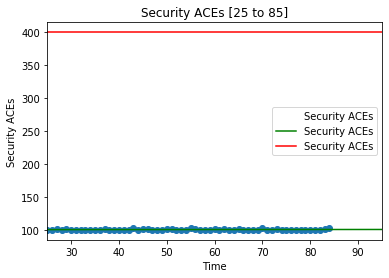

100.12690562193201 [0.00739094]


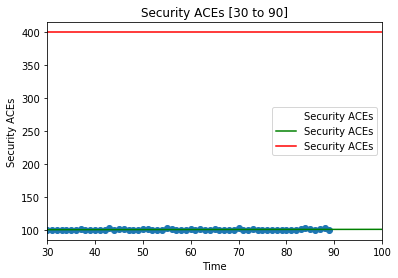

100.28619060850237 [0.00564046]


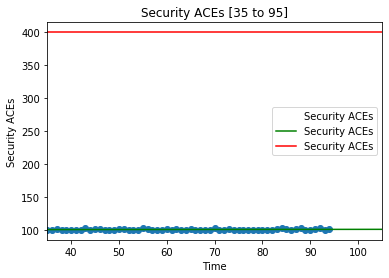

100.58870982680375 [0.00136149]


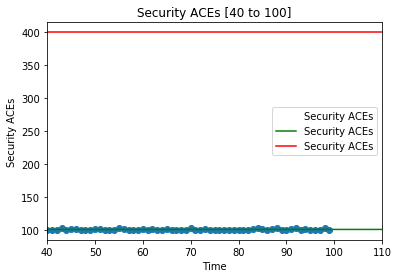

100.25906270260258 [0.00561267]


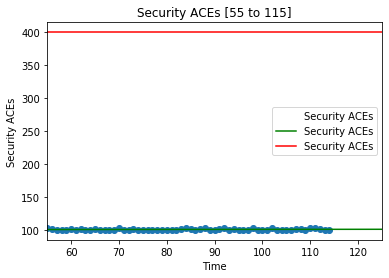

100.1685653422247 [0.0057516]


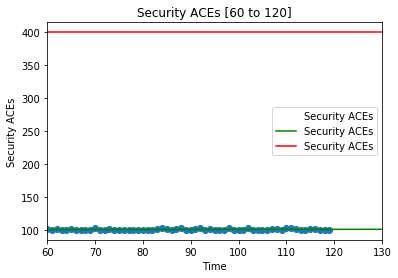

100.50741872742428 [0.00161156]


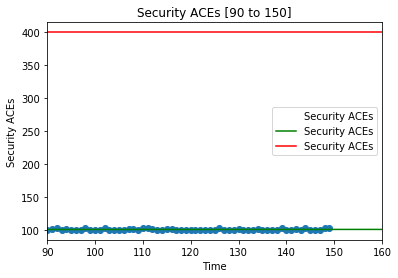

99.56409187737334 [0.0093915]


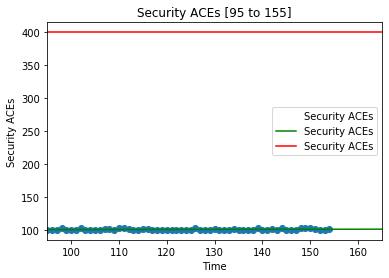

98.9347967027878 [0.01453181]


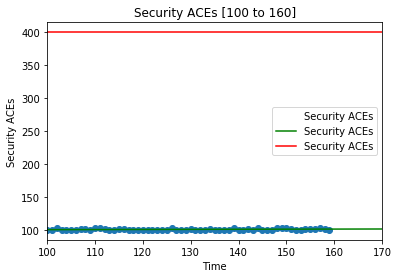

98.38116143373159 [0.01872742]


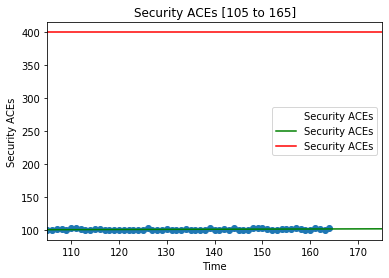

99.85113457441881 [0.0072798]


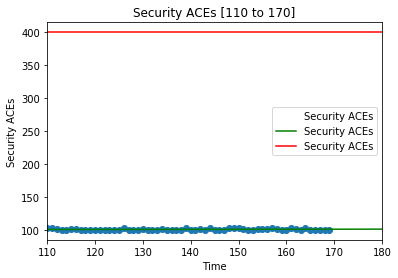

97.74761507826248 [0.02170047]


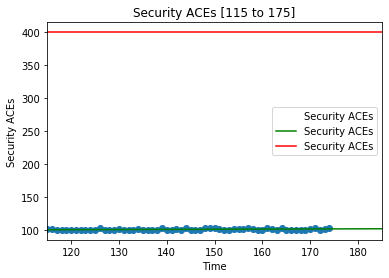

97.76813929795314 [0.02139483]


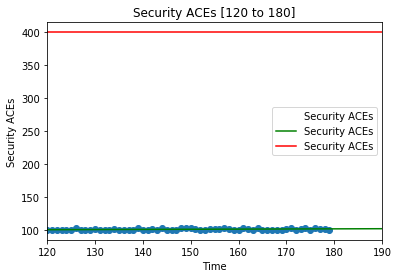

98.37832731314253 [0.017616]


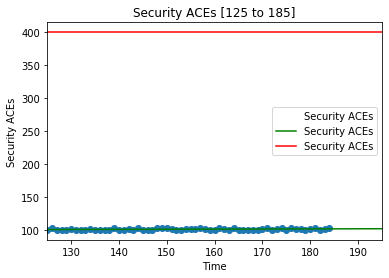

99.15675650643698 [0.01239233]


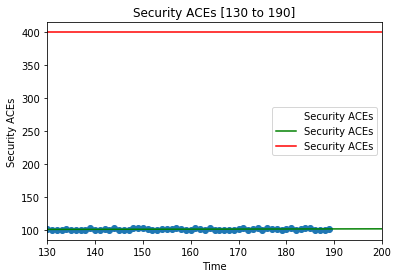

100.25652496063721 [0.00222284]


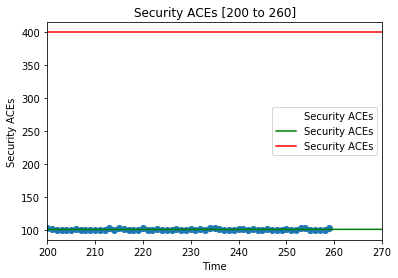

98.5455682133926 [0.00961378]


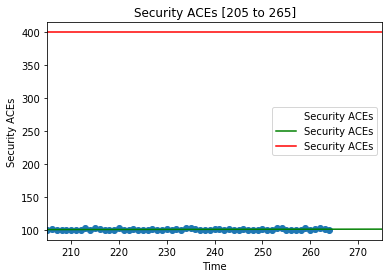

99.74527183476891 [0.00447346]


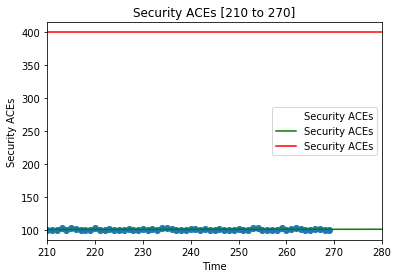

100.6875891451329 [0.00052792]


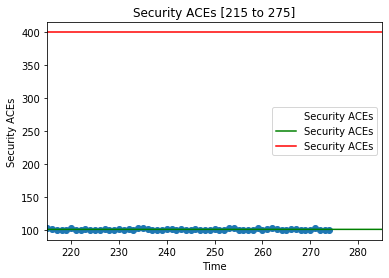

100.52881355932203 [0.00080578]


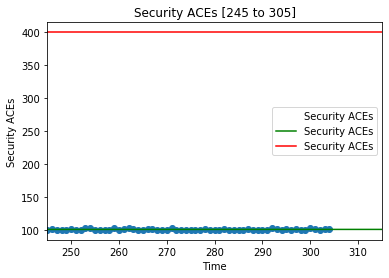

98.90109289617486 [0.00655738]


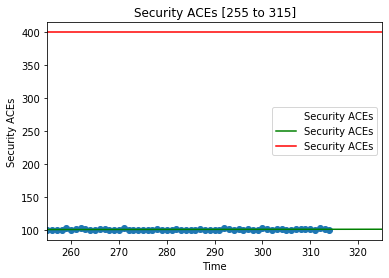

98.19493377790127 [0.00911364]


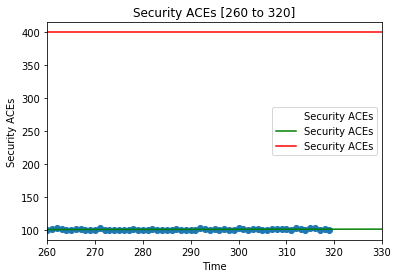

96.31580994720755 [0.01522645]


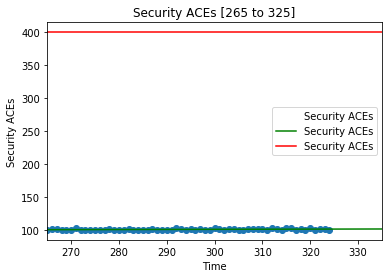

98.52809113642678 [0.00741873]


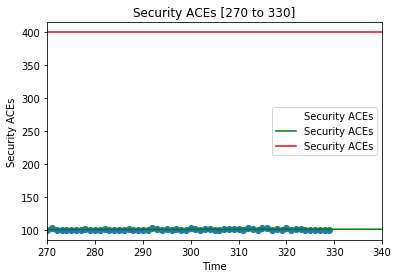

100.54770769658239 [0.00050014]


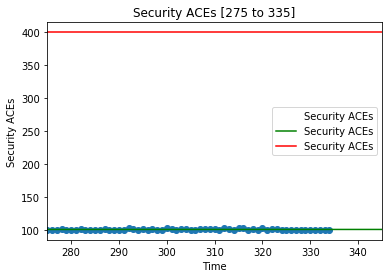

98.52863758451421 [0.00744651]


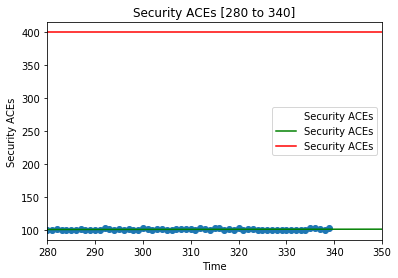

100.45514494767066 [0.00136149]


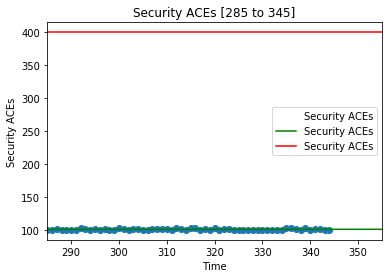

98.9391405019913 [0.00477911]


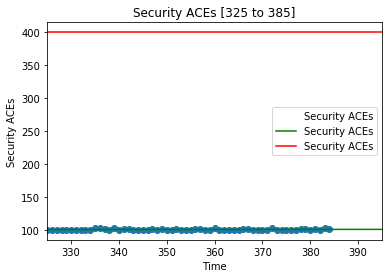

98.58908956191534 [0.00605724]


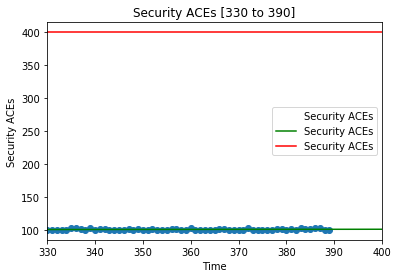

98.13331480966936 [0.00694637]


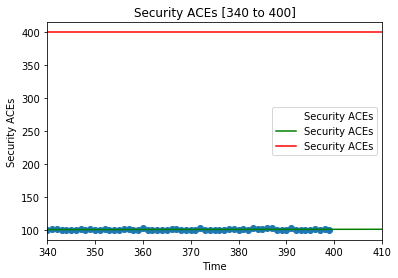

95.78649624895804 [0.01325368]


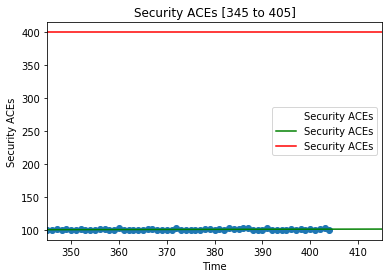

94.95829397054737 [0.01539316]


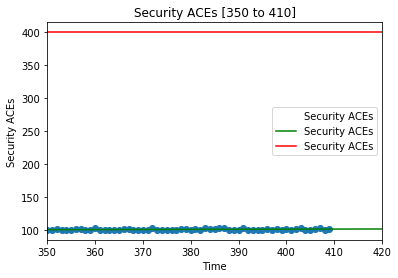

94.6881726405483 [0.01619894]


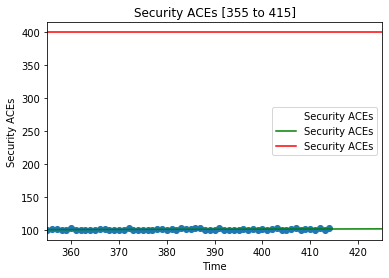

97.84222469204408 [0.00780772]


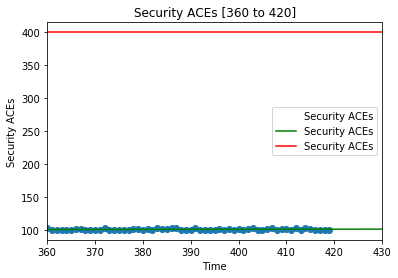

99.53508381957951 [0.00341762]


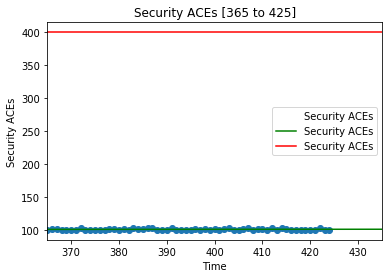

73.69726775956283 [0.06557377]


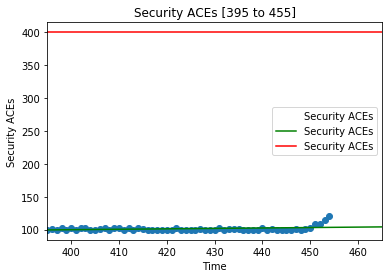

20.03552838751503 [0.19335927]


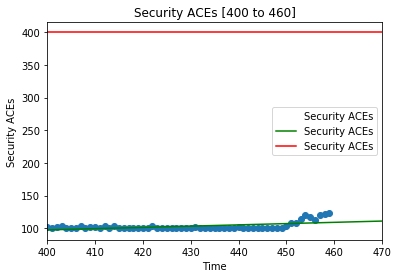

-68.1666666666667 [0.4]


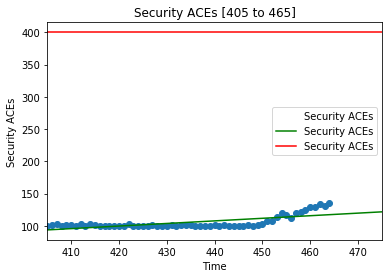

-145.7793090673336 [0.57829953]


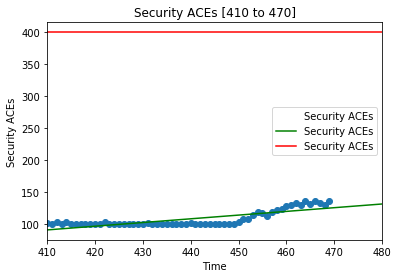

-213.79820320459393 [0.73134204]


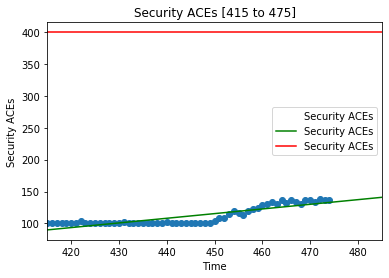

-291.69390571455057 [0.90514032]


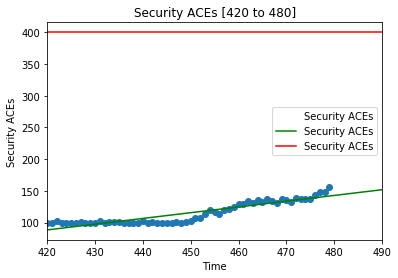

-379.75550615911857 [1.09938872]


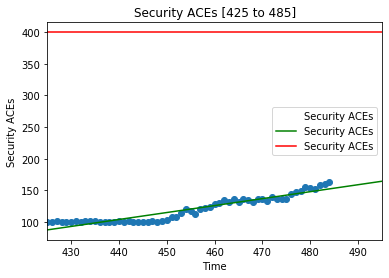

-506.38177271464315 [1.37732704]


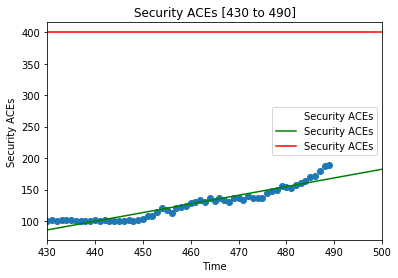

-650.7080763174959 [1.69058072]


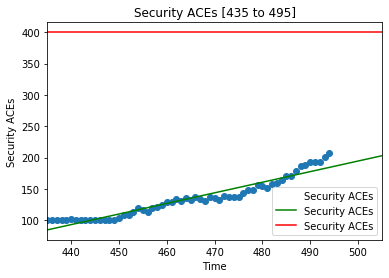

-808.954181717144 [2.03078633]


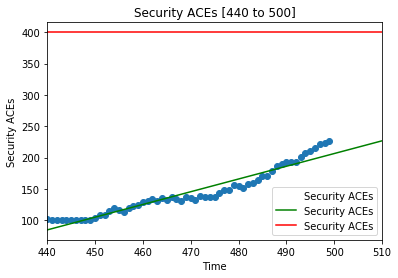

-951.0747892933223 [2.33264796]


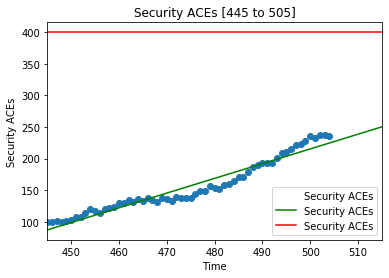

-1066.8587107529875 [2.5762434]


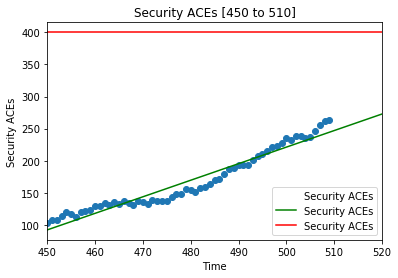

-1194.5796332314535 [2.84092804]


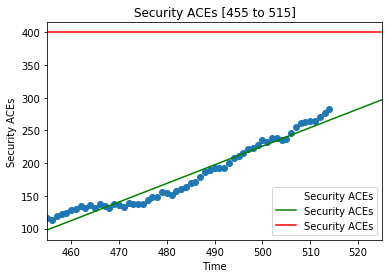

-1324.4615633972403 [3.10639066]


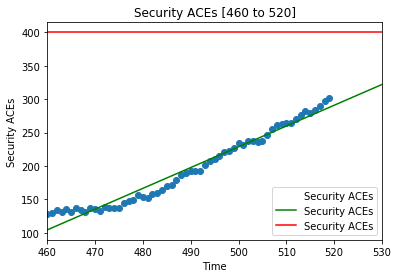

-1481.308854311383 [3.42270075]


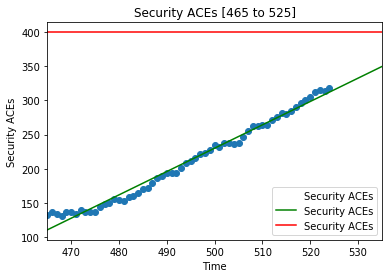

-1552.3665740483475 [3.56179494]


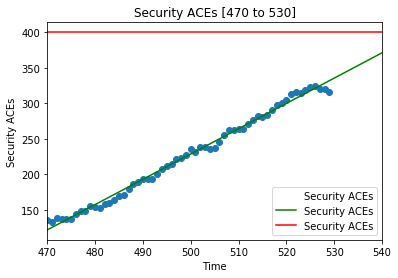

-1505.8614337315926 [3.46474021]


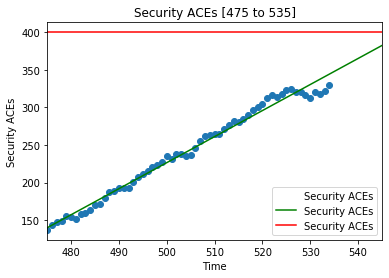

-1451.0761693062893 [3.35487635]


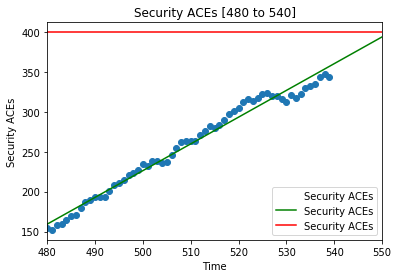

-1348.788626470316 [3.15482078]


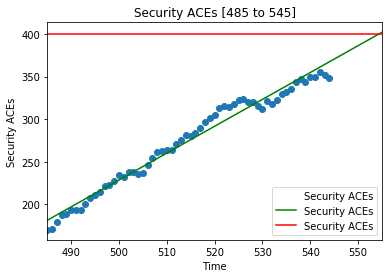

In [146]:
WINDOW_SIZE = 60
SAMPLE_EVERY = 5
LOOKAHEAD = 10
BREACH = 400


for i in range(0, 1440):
    if (i >= WINDOW_SIZE) and not (i % SAMPLE_EVERY):
        
        # create sample data frame
        sample_df = df.take([s for s in range(i - WINDOW_SIZE, i)])
        
        # do the linear regression, no traint/test split
        x = sample_df.iloc[:, :-1].values
        y = sample_df.iloc[:, 1].values
        regressor = LinearRegression()
        regressor.fit(x, y)
        
        # plot the sample data if the gradient > 0
        if regressor.coef_ > 0.0:
            print(regressor.intercept_, regressor.coef_)

            # scatter plot of raw data
            ax = sample_df.plot(x='Time', y='Security ACEs', style='o')
            
            # add straight line for intercept & co-efficient
            x_line = [s for s in range(i - WINDOW_SIZE, i)] + [i + LOOKAHEAD]
            y_line = [regressor.intercept_ + regressor.coef_[0] * x for x in x_line]
            line_df = pd.DataFrame({'Time': x_line, 'Security ACEs': y_line})
            ax = line_df.plot(x='Time', y='Security ACEs', style='-g', ax=ax)
            
            # add a constant for the "breach" threshold
            breach_df = pd.DataFrame({
                'Time': x_line,
                'Security ACEs': [BREACH for _ in x_line]})
            ax = breach_df.plot(x='Time', y='Security ACEs', style='-r', ax=ax)
            
            # display plot
            plt.title('Security ACEs [%d to %d]' % (i - WINDOW_SIZE, i))
            plt.xlabel('Time')
            plt.ylabel('Security ACEs')
            plt.show()
            
            # if at lookahead time the value will breach the
            # arbitrary limit, break
            if y_line[-1] > BREACH:
                break
            